In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HePy as he

Build an $|n\ell m_{\ell}\rangle$ basis. Input array of $n$ values and array of $m_{\ell}$ values you wish to consider.

In [2]:
nmin, nmax = 36, 38
ns = np.arange(nmin,nmax+1,1)
mls = [0]
basis = he.Basis(ns,mls)

Index basis array as [state][quantum number] i.e [0][0] is the value of $n$ for the first state, [5][1] is the value of $\ell$ for the fifth state etc.

Calculate $\hat{H}_0$ which is a diagonal square matrix of field free energies:
<br><br>
$W = -\frac{R_{He}c}{(n-\delta)^2}$

`N.B. Currently only supports triplet states.`

In [3]:
H0 = he.H_0(basis)

Calculate $\hat{H}_{Stark}$ - the off diagonal field pertubations to the field free energies. Calculate for 1 V/m (the default value of $F_z$) as a base, then multiply by the field values later. **This calculation is slow**, so best to only do it once if possible.

In [4]:
Hs = he.H_s(basis)

100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:53<00:00,  2.06it/s]


Now you've got both parts of the total hamiltonian, add them together, multiply by the field values, diagonalise the total matrix and sort the eigenvlaues. 

In [5]:
Fz_arr = np.arange(0,5000,2) # V/m
Eigvals, Eigvecs = he.E_Stark(H0,Hs,Fz_arr)

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:09<00:00, 257.40it/s]


Index the eigenvalues as [state, field] - for example: locate the `37p` state.

In [6]:
idx = he.lookup_eigval(basis,37,1) # (basis,n,l)

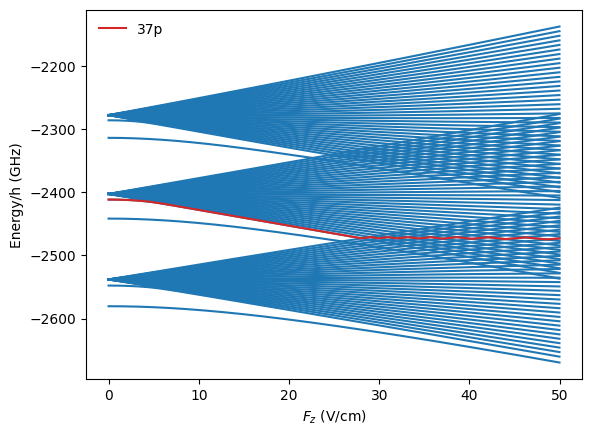

In [7]:
# Plot the energies for all states in all fields
for i in range(len(Eigvals)):
    plt.plot(Fz_arr*1e-2,Eigvals[i,:]*1e-9,ls='-',marker='',c='tab:blue')
    
# Highlight the 37p state using index located above
plt.plot(Fz_arr*0.01,Eigvals[idx,:]*1e-9,ls='-',marker='',c='tab:red',label='37p')


plt.xlabel(r'$F_z$ (V/cm)')
plt.ylabel('Energy/h (GHz)')
plt.legend(loc='best',frameon=False);

# plt.xlim(20,40)
# plt.ylim(-2575,-2400)